In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
pop = np.random.poisson(100, 1000);

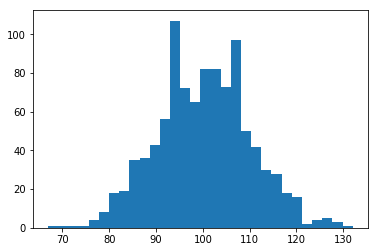

In [3]:
hist(pop, bins = 30);

In [4]:
np.random.seed(150)
# decision about population
mymean = 800.
mystdv =14
Nsamples = 100
nit = 1000
myDmeans = np.zeros(nit)
pop = np.zeros(nit)
for i in range(nit):
    pop=sp.stats.poisson.rvs(mu = mymean, size= Nsamples)
    myDmeans[i]=pop.mean()


In [5]:
pop

array([783, 840, 843, 806, 783, 781, 781, 820, 810, 767, 838, 832, 818,
       745, 774, 854, 782, 824, 817, 803, 762, 772, 786, 833, 780, 832,
       839, 808, 764, 803, 839, 832, 803, 775, 762, 819, 819, 788, 784,
       798, 824, 795, 803, 814, 802, 783, 769, 798, 793, 805, 782, 837,
       783, 747, 759, 790, 775, 792, 802, 828, 828, 747, 774, 792, 775,
       788, 757, 775, 785, 789, 793, 744, 805, 809, 824, 785, 801, 814,
       779, 797, 818, 819, 780, 815, 857, 834, 832, 802, 793, 708, 827,
       808, 770, 810, 835, 764, 785, 784, 792, 788])

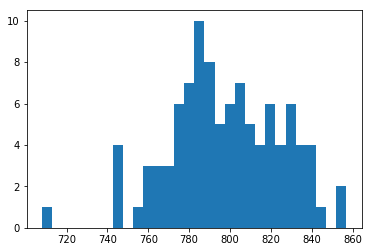

In [6]:
pl.hist(pop, bins = 30);

In [7]:
samplestd=np.std(pop)

In [8]:
np.std(myDmeans)

2.7852731956488568

In [9]:
zs = ((mymean - myDmeans)*np.sqrt(Nsamples))/samplestd

(array([   2.,    6.,   18.,   70.,  167.,  262.,  239.,  162.,   58.,   16.]),
 array([-4.10185313, -3.40427919, -2.70670525, -2.00913131, -1.31155737,
        -0.61398343,  0.08359051,  0.78116446,  1.4787384 ,  2.17631234,
         2.87388628]),
 <a list of 10 Patch objects>)

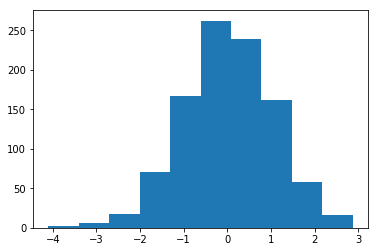

In [10]:
pl.hist(zs)

In [11]:
sp.stats.kstest(zs,'norm')

KstestResult(statistic=0.020959062973442633, pvalue=0.77195235269085605)

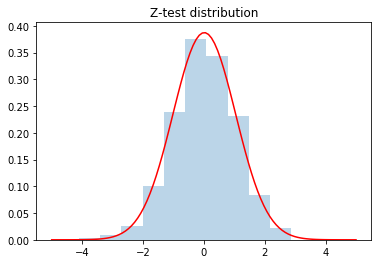

In [15]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title


param = norm.fit(zs) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])


title('Z-test distribution')
plot(x,pdf_fitted,'r-')
hist(zs,normed=1,alpha=.3)
show()